In [ ]:
https://github.com/DirkEngfer/PandasTests
Hourly NO2 measures in Bornhoeved (Schleswig-Holstein/Germany). programmer: Dirk Engfer, Germany
Provided Input data file: NO2_2019_Bornhoeved.csv

------------------------------
Original source of Input Data:
------------------------------
Quelle: Umweltbundesamt, https://www.umweltbundesamt.de/daten/luft/luftdaten/stationen
        (Abruf: 02.10.2020). Alle Uhrzeiten sind in der jeweils zum Messzeitpunkt
        gültigen Zeit (MEZ bzw. MESZ) angegeben.


In [1]:
import os, numpy as np
import pandas as pd
homedir = os.getenv('HOME')

datapath = os.path.join(homedir, 'Dokumente','python-apps','tensorflow', 'eu_air_pollution_data')
datafile = 'NO2_2019_Bornhoeved.csv'

indatapath = os.path.join(datapath,datafile)

In [ ]:
Aggregate data as follows:
    Pick the 3 highest measures of each day and calculate the arithmetic mean value of these.

               Stationsname     mydate   Messwert  day_count  Jahresgrenzwert
365  Kiel-Bahnhofstr. Verk. 2019-01-01  13.333333          1               40
366  Kiel-Bahnhofstr. Verk. 2019-01-02  63.666667          2               40
367  Kiel-Bahnhofstr. Verk. 2019-01-03  99.666667          3               40
368  Kiel-Bahnhofstr. Verk. 2019-01-04  59.333333          4               40
369  Kiel-Bahnhofstr. Verk. 2019-01-05  58.666667          5               40
..                      ...        ...        ...        ...              ...
725  Kiel-Bahnhofstr. Verk. 2019-12-27  40.333333        361               40
726  Kiel-Bahnhofstr. Verk. 2019-12-28  62.333333        362               40
727  Kiel-Bahnhofstr. Verk. 2019-12-29  34.666667        363               40
728  Kiel-Bahnhofstr. Verk. 2019-12-30  59.333333        364               40
729  Kiel-Bahnhofstr. Verk. 2019-12-31  70.000000        365               40

[365 rows x 5 columns]


Text(0, 0.5, 'NO2 [microgram/m3]')

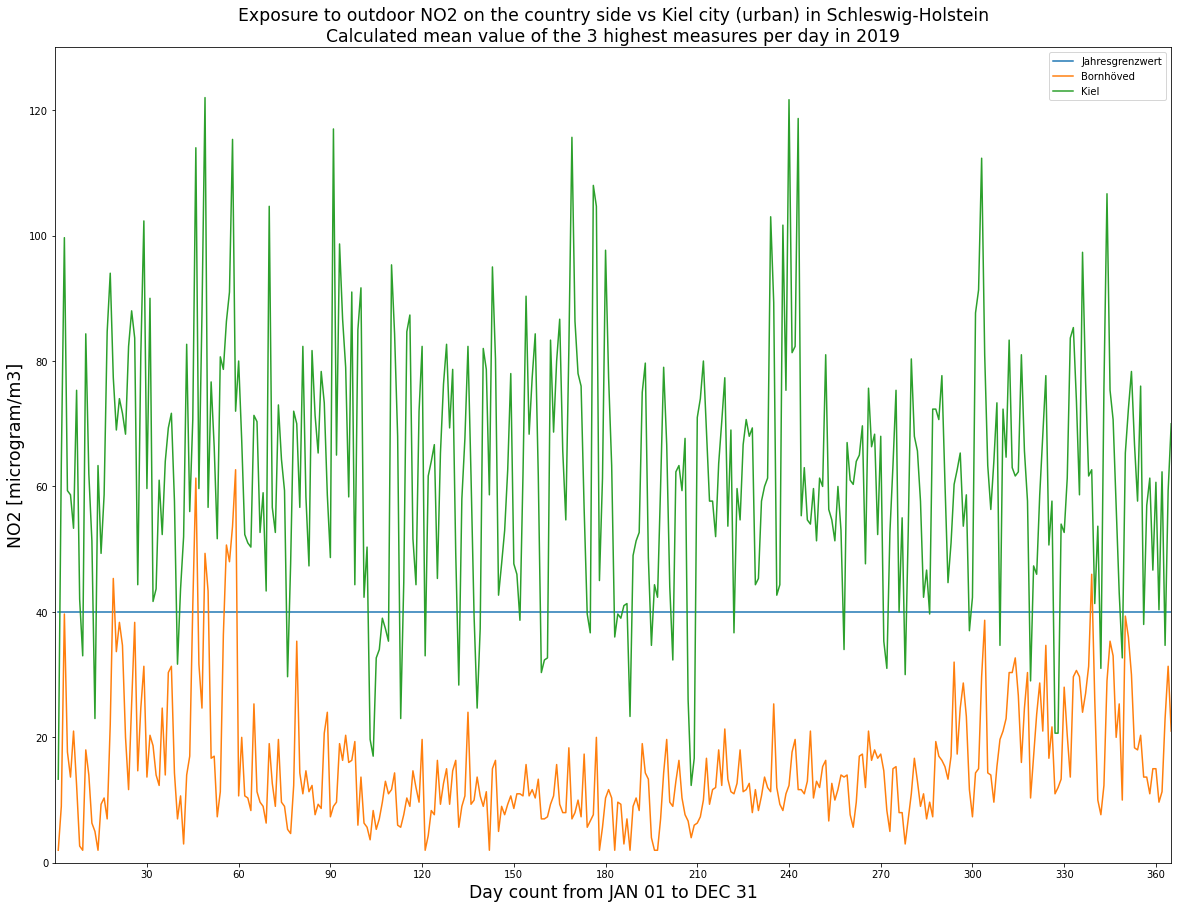

In [3]:
df = pd.read_csv(indatapath, header=0, sep=',',usecols=[2,7,8,9])
df = df.loc[(df.Stationsname.isin(['Bornhöved', 'Kiel-Bahnhofstr. Verk.']))]
df = df.loc[(df.Messwert.str.contains(pat='-')) == False]
df['Messwert']  = df['Messwert'].astype(np.int)
from datetime import datetime
f = lambda x:datetime.strptime(x[-10:], "%d.%m.%Y")
df['mydate'] = df['Datum'].map(f)

df.sort_values(by=['Stationsname', 'mydate', 'Messwert'], ascending=[True,True, False], inplace=True, axis=0)
dailymean = df.groupby(['Stationsname', 'mydate'], sort=False, as_index=False).nth([0,1,2]).groupby(['Stationsname', 'mydate'], sort=False, as_index=False).mean()
dailymean['day_count'] = dailymean.groupby('Stationsname', sort=False, as_index=False).cumcount().add(1)
dailymean['Jahresgrenzwert'] = 40
Ki = dailymean.loc[(dailymean.Stationsname.isin(['Kiel-Bahnhofstr. Verk.']))]
dailymean = dailymean.loc[(dailymean.Stationsname.isin(['Bornhöved']))]
print(Ki)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20,15])

ax.plot(dailymean['day_count'], dailymean['Jahresgrenzwert'], label='Jahresgrenzwert')
ax.plot(dailymean['day_count'], dailymean['Messwert'], label='Bornhöved')
ax.plot(Ki['day_count'], Ki['Messwert'], label='Kiel')
ax.set_title('Exposure to outdoor NO2 on the country side vs Kiel city (urban) in Schleswig-Holstein\nCalculated mean value of the 3 highest measures per day in 2019', fontsize='xx-large')
ax.set_xlim(0, 365)
ax.set_ylim(0, 130)
ax.set_xticks(range(30,365,30))
ax.legend()
plt.xlabel('Day count from JAN 01 to DEC 31', fontsize='xx-large')
plt.ylabel('NO2 [microgram/m3]', fontsize='xx-large')
